# Data Science for Marketing

## Academic Project

#### Tasks
For the elaboration of this project you will be asked to manipulate, explore, analyze, and interpret a dataset. Each tasks is explained in a markdown cell. Each task is identified with a number.

#### Guidelies
The notebook should be completed with the code and analysis needed to answer the tasks. 

#### Dataset
The data was collected from airbnb by a project called inside airbnb. They frequently scrape the airbnb site, listing by listing, and then publish the results with a Creative Commons CC0 1.0 Universal (CC0 1.0) "Public Domain Dedication" license, meaning we can copy, modify, distribute and perform the work, even for commercial purposes, all without asking permission. Two csv files have been sent to you. You will need to use both of them for this project, in different moments, of course.

Source: http://insideairbnb.com/get-the-data.html (Porto - 28 November 2019)

#### Goals
Derive data-driven insights about the airbnb market in Porto.

#### Tasks
This project consists of 22 sequential tasks. You are given a cell to write your code (if you need more add them) and a markdown section to write an answer to the question.

# Boilerplate

In [1]:
# Some packages/libraries you might need to perform the tasks

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats
from scipy import stats

In [2]:
#  If you need to load additional libraries please do it so in this cell

from numpy import mean
from numpy import std
from numpy import percentile
import pylab
import seaborn as sns

## Data Ingestion

<b> Task #1 </b><br>
Import the listings.csv dataset as a pandas dataframe. <br>
Display the top five records in the dataframe.<br>

In [3]:
# Use this cell to write the necessary code to perform Task #1

df = pd.read_csv("listings.csv", low_memory=False)
df.head()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,41339,https://www.airbnb.com/rooms/41339,20191128004830,2019-11-28,Porto city flat near the sea,Here you'll find all you need for your holiday...,"Apartment facing Southeast, with a big bedroom...",Here you'll find all you need for your holiday...,none,In the surrounds you have Serralves Museum and...,...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,0.21
1,42462,https://www.airbnb.com/rooms/42462,20191128004830,2019-11-28,Large Penthouse in Vila Nova Gaia,The Afurada Harbour can be reached within 10 m...,It's the perfect choice for family holidays or...,The Afurada Harbour can be reached within 10 m...,none,NaN,...,t,f,strict_14_with_grace_period,f,f,3,3,0,0,0.46
2,55111,https://www.airbnb.com/rooms/55111,20191128004830,2019-11-28,Fontielas Houses |Floor1 in House with shared ...,First Floor in House with shared Swimingpool a...,The first floor in house with shared pool. It...,First Floor in House with shared Swimingpool a...,none,NaN,...,f,f,moderate,f,f,3,3,0,0,0.26
3,70925,https://www.airbnb.com/rooms/70925,20191128004830,2019-11-28,APARTMENT WITH THE BEST CITY VIEW,Two separate bedrooms are an undeniable advan...,Apartment with the best view of the Porto city...,Two separate bedrooms are an undeniable advan...,none,"The house is near of the supermarkets, the Dou...",...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.56
4,73828,https://www.airbnb.com/rooms/73828,20191128004830,2019-11-28,Fontielas Houses |Floor0 in House with shared ...,Piso no rés-do-chão em moradia com piscina par...,The first floor in house with shared pool. Ou...,Piso no rés-do-chão em moradia com piscina par...,none,NaN,...,f,f,moderate,f,f,3,3,0,0,0.14


Answer:

<b> Task #2 </b><br>
Verify if there are duplicate values in the id column?

In [4]:
# Use this cell to write the necessary code to perform Task #2

dupes = df['id'].duplicated()
print(df['id'][dupes])


Series([], Name: id, dtype: int64)


<b>Answer:</b> It returns empty series object, so id column doesn't have any duplicate value.

<b> Task #3</b><br>

The file you have loaded contains too many columns and we have limited time. <br>
Create a smaller dataframe that only contains the following columns:

id, space, host_id, host_since, host_location, host_is_superhost, host_listings_count, host_identity_verified, smart_location, property_type, room_type, accommodates, bathrooms, bedrooms, beds, amenities, price, minimum_nights, maximum_nights, availability_30, availability_60, availability_90, availability_365, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, instant_bookable, cancellation_policy, calculated_host_listings_count, calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms, calculated_host_listings_count_shared_rooms, reviews_per_month

For each of these columns, what are their data types?

Note: From now on we will work with only this dataframe.

In [5]:
# Use this cell to write the necessary code to perform Task #3
df1 = df[['id', 'space', 'host_id', 'host_since', 'host_location', 'host_is_superhost', 'host_listings_count',
          'host_identity_verified', 'smart_location', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
          'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60',
          'availability_90', 'availability_365', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
          'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value',
          'instant_bookable', 'cancellation_policy', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
          'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month']]

df1


,id,space,host_id,host_since,host_location,host_is_superhost,host_listings_count,host_identity_verified,smart_location,property_type,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,41339,"Apartment facing Southeast, with a big bedroom...",180050,2010-07-25,"Oporto, Porto District, Portugal",f,19.0,t,"Porto, Portugal",Apartment,...,10.0,9.0,9.0,t,strict_14_with_grace_period,1,1,0,0,0.21
1,42462,It's the perfect choice for family holidays or...,185492,2010-07-30,"Vila Nova de Gaia, Porto District, Portugal",t,3.0,t,"Vila Nova de Gaia-Palmeira, Portugal",Apartment,...,10.0,9.0,9.0,t,strict_14_with_grace_period,3,3,0,0,0.46
2,55111,The first floor in house with shared pool. It...,259711,2010-10-12,"Porto, Porto, Portugal",t,3.0,t,"Paredes Municipality, Portugal",Apartment,...,10.0,10.0,10.0,f,moderate,3,3,0,0,0.26
3,70925,Apartment with the best view of the Porto city...,361205,2011-01-25,"Vila Nova de Gaia, Porto District, Portugal",t,2.0,t,"Vila Nova de Gaia, Portugal",Apartment,...,10.0,10.0,10.0,f,strict_14_with_grace_period,2,2,0,0,0.56
4,73828,The first floor in house with shared pool. Ou...,259711,2010-10-12,"Porto, Porto, Portugal",t,3.0,t,"Estação, Portugal",Apartment,...,10.0,10.0,9.0,f,moderate,3,3,0,0,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11651,40421454,NaN,35468894,2015-06-10,"Porto, Porto District, Portugal",t,14.0,f,"Porto, Portugal",Apartment,...,NaN,NaN,NaN,t,flexible,18,18,0,0,NaN
11652,40421547,"This apartment, located in Porto, is ideal for...",137500257,2017-06-28,"Lisbon, Lisbon, Portugal",f,564.0,f,"Porto, Portugal",Apartment,...,NaN,NaN,NaN,f,strict_14_with_grace_period,48,48,0,0,NaN
11653,40421819,NaN,35468894,2015-06-10,"Porto, Porto District, Portugal",t,14.0,f,"Porto, Portugal",Apartment,...,NaN,NaN,NaN,t,flexible,18,18,0,0,NaN
11654,40421988,NaN,35468894,2015-06-10,"Porto, Porto District, Portugal",t,14.0,f,"Porto, Portugal",Apartment,...,NaN,NaN,NaN,t,flexible,18,18,0,0,NaN


Answer:

## Data Manipulation and Feature Engineering

Lets take a closer look the price feature. <br>
It has a object data type, however we need to work it as a float. Furthermore it is expressed in dollars, which is a problem.

<b> Task #4 </b><br>
Create a new column priceDollar the price as a float.

In [6]:
num_list = []
for i in df['price'].tolist():
    
    num_list.append(i[1:])
    
print(len(df['price']) == len(num_list))

dollar_list = [float(i) for i in num_list]
dollar_list

True


ValueError: could not convert string to float: '8,509.00'

Here we have a record in which price isn't given in the standard format, so we delete that row from df1

In [7]:
# find the records in which price isn't following standard format

indices = []
n = 0
for i in df1['price'].tolist():
    for j in i:
        
        if j == ',':
            
            indices.append(n)
            
    n+=1
        
    
print("Here we have "+str(len(indices))+" records that aren't following standard format,their indices are \n\n"+str(indices))
        

Here we have 53 records that aren't following standard format,their indices are 

[273, 3427, 3661, 3860, 4465, 6086, 7485, 7486, 7501, 7502, 7503, 7504, 8733, 8734, 8735, 8737, 8738, 8796, 9545, 9750, 9751, 9752, 9753, 9754, 9755, 9756, 9757, 9758, 9760, 9761, 9762, 9888, 9889, 9890, 10111, 10114, 10115, 10547, 10548, 10562, 10700, 10701, 10702, 10703, 10765, 10766, 10767, 10769, 10770, 10771, 10823, 10973, 11196]


So first we delete these rows from df1

In [8]:
df1.drop(indices, axis = 0, inplace = True )
print("Records are deleted")

Records are deleted


C:\Users\d store\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
df1.reset_index(inplace = True)
df1.head()

,index,id,space,host_id,host_since,host_location,host_is_superhost,host_listings_count,host_identity_verified,smart_location,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,41339,"Apartment facing Southeast, with a big bedroom...",180050,2010-07-25,"Oporto, Porto District, Portugal",f,19.0,t,"Porto, Portugal",...,10.0,9.0,9.0,t,strict_14_with_grace_period,1,1,0,0,0.21
1,1,42462,It's the perfect choice for family holidays or...,185492,2010-07-30,"Vila Nova de Gaia, Porto District, Portugal",t,3.0,t,"Vila Nova de Gaia-Palmeira, Portugal",...,10.0,9.0,9.0,t,strict_14_with_grace_period,3,3,0,0,0.46
2,2,55111,The first floor in house with shared pool. It...,259711,2010-10-12,"Porto, Porto, Portugal",t,3.0,t,"Paredes Municipality, Portugal",...,10.0,10.0,10.0,f,moderate,3,3,0,0,0.26
3,3,70925,Apartment with the best view of the Porto city...,361205,2011-01-25,"Vila Nova de Gaia, Porto District, Portugal",t,2.0,t,"Vila Nova de Gaia, Portugal",...,10.0,10.0,10.0,f,strict_14_with_grace_period,2,2,0,0,0.56
4,4,73828,The first floor in house with shared pool. Ou...,259711,2010-10-12,"Porto, Porto, Portugal",t,3.0,t,"Estação, Portugal",...,10.0,10.0,9.0,f,moderate,3,3,0,0,0.14


In [10]:
df1.drop('index', axis = 1, inplace = True)
df1.head()

,id,space,host_id,host_since,host_location,host_is_superhost,host_listings_count,host_identity_verified,smart_location,property_type,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,41339,"Apartment facing Southeast, with a big bedroom...",180050,2010-07-25,"Oporto, Porto District, Portugal",f,19.0,t,"Porto, Portugal",Apartment,...,10.0,9.0,9.0,t,strict_14_with_grace_period,1,1,0,0,0.21
1,42462,It's the perfect choice for family holidays or...,185492,2010-07-30,"Vila Nova de Gaia, Porto District, Portugal",t,3.0,t,"Vila Nova de Gaia-Palmeira, Portugal",Apartment,...,10.0,9.0,9.0,t,strict_14_with_grace_period,3,3,0,0,0.46
2,55111,The first floor in house with shared pool. It...,259711,2010-10-12,"Porto, Porto, Portugal",t,3.0,t,"Paredes Municipality, Portugal",Apartment,...,10.0,10.0,10.0,f,moderate,3,3,0,0,0.26
3,70925,Apartment with the best view of the Porto city...,361205,2011-01-25,"Vila Nova de Gaia, Porto District, Portugal",t,2.0,t,"Vila Nova de Gaia, Portugal",Apartment,...,10.0,10.0,10.0,f,strict_14_with_grace_period,2,2,0,0,0.56
4,73828,The first floor in house with shared pool. Ou...,259711,2010-10-12,"Porto, Porto, Portugal",t,3.0,t,"Estação, Portugal",Apartment,...,10.0,10.0,9.0,f,moderate,3,3,0,0,0.14


In [11]:
# Use this cell to write the necessary code to perform Task #4

dollar_list = []

for i in df1['price'].tolist():
    
    dollar_list.append(float(i[1:]))
    
    
print(len(df1['price']) == len(dollar_list))


df1['priceDollar'] = dollar_list

print(df1['priceDollar'].head())

print(df1['priceDollar'].dtype)

True
0    58.0
1    50.0
2    66.0
3    97.0
4    66.0
Name: priceDollar, dtype: float64
float64


C:\Users\d store\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


<b> Task #5 </b><br>
Create a new column priceEuro using a conversion rate of 1 Dollar = 0.9 Euro.

In [12]:
# Use this cell to write the necessary code to perform Task #5

Euro_list = []

for i in df1['priceDollar'].tolist():
    
    Euo_conversion = i * 0.9
    
    Euro_list.append(round(Euo_conversion, 2))
    
df1['priceEuro'] = Euro_list

df1['priceEuro'].head()    
    

C:\Users\d store\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


0    52.2
1    45.0
2    59.4
3    87.3
4    59.4
Name: priceEuro, dtype: float64

Answer:

<b> Task #6 </b><br>
Analyze the priceEuro feature. Calculate the lower and upper bounds for potential outliers using the three methods: Percentiles, Tukey’s fence, and Standard deviation.

Which limits do you suggest to use and why?

In [13]:
# Use this cell to write the necessary code to perform Task #6

# 1- Standard deviation method

# calculate summary statistics
data_mean, data_std = np.mean(df1['priceEuro']), np.std(df1['priceEuro'])

# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

# identify outliers
outliers_by_std = [x for x in df1['priceEuro'] if x < lower or x > upper]


# 2- Percentile Method

# calculate interquartile range
q25, q75 = np.percentile(df1['priceEuro'], 25), np.percentile(df1['priceEuro'], 75)
iqr = q75 - q25

# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

# identify outliers
outliers_by_perc = [x for x in df1['priceEuro'] if x < lower or x > upper]


print(len(outliers_by_std))
print(len(outliers_by_perc))


191
829


Answer: I suggest percentile method, because It works on IQR and find most pottential outliers.

<b> Task #7 </b><br>
Plot a histogram of the priceEuro column for all prices >= 10 EUR and <= 400 EUR.

In [14]:
df_price_euro = df1['priceEuro'].to_frame()
df_price_euro1 = df_price_euro[(df_price_euro['priceEuro'] >=10) & (df_price_euro['priceEuro'] <=400)]
df_price_euro1

,priceEuro
0,52.2
1,45.0
2,59.4
3,87.3
4,59.4
...,...
11598,90.0
11599,85.5
11600,90.0
11601,40.5


In [15]:
# now we write func to create hist

def create_hist(hist,bin_edges):
    
    plt.figure(figsize=[12,10])

    plt.bar(bin_edges[:-1], hist, width = 5, color='#0504aa',alpha=0.7)
    plt.xlim(min(bin_edges), max(bin_edges))
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('priceEuro',fontsize=15)
    plt.ylabel('Frequency',fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylabel('Frequency',fontsize=15)
    plt.title('Normal Distribution Histogram',fontsize=15)
    plt.show()
    

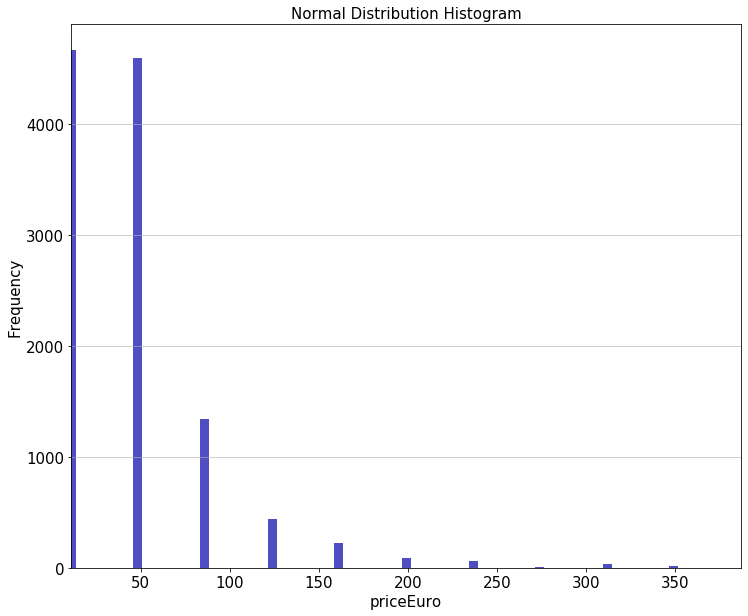

In [16]:
# Use this cell to write the necessary code to perform Task #7

hist,bin_edges = np.histogram(df_price_euro1['priceEuro'])
bin_edges = np.round(bin_edges,0)
create_hist(hist,bin_edges)


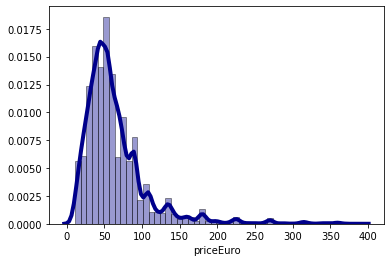

In [24]:
# Density Plot and Histogram of all arrival delays
sns.distplot(df_price_euro1['priceEuro'], hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Answer:

<b> Task #8 </b><br>
Describe the distribution of the data, using the metrics you find more reasonable. Explain your choice.

In [17]:
# find mean & median 

print("Mean: "+str(round(df_price_euro1['priceEuro'].mean(),2)))
print("Median: "+str(df_price_euro1['priceEuro'].median()))

Mean: 63.89
Median: 54.0


In [18]:
# find range and IQR

print("Range: "+str(df_price_euro1['priceEuro'].max() - df_price_euro1['priceEuro'].min()))
q25, q75 = percentile(df_price_euro1['priceEuro'], 25), percentile(df_price_euro1['priceEuro'], 75)
iqr = q75 - q25
print("IQR: "+str(iqr))

Range: 376.2
IQR: 38.7


In [19]:
print("Standard deviation: "+str(round(df_price_euro1['priceEuro'].std(), 2)))

Standard deviation: 42.76


### Explanation

<b>1- Shape: </b>Since the above histogram contain long tail on right side, so it is right skewed. And there is only one trend from left to right, so it is unimomodal


<b> 2- Center: </b>We'll calculate median to find center of data just because the data is skewed and the median is less affected by outliers and skewed data.

<b> 3- Range: </b>Since the above dataset is skewed, so we use IQR as a range of normal data values. Quartiles are a useful measure of spread for skewed data set.

<b> 4- Spread: </b> We'll use Standard deviation to calculate measure of spread in the data.



<b> Task #9 </b><br>
Note: A common trick to handle currency variables is to work with the Log transform. In that sense, we will have to handle values that are equal to 0 (the log of 0 is not defined). A trick is to sum 1 to all entries and do the log. For instance, log(price+1). The +1 one will avoid problems carried by the definition of the log.

Apply the Log transformation for values between 10 and 400, and store it in a new feature called "logPriceEuro".
Plot the histogram of the logPriceEuro values.

What do you conclude from the transformation?

Test the distribution of the logPriceEuro for normality. Consider using both the q-q plots and the Kolmogorv-Smirnov test.

Interpret the results of both tests plus the histogram with regards to the normality of the data.

In your opinion, should we consider the logaritmically transformed variable as opposed to the original?

In [20]:
df_10_to_400 = df1[(df1['priceEuro'] >=10) & (df1['priceEuro'] <=400)]
len(df_10_to_400)

11479

In [21]:
df_10_to_400['logPriceEuro'] = np.log(df_price_euro1['priceEuro']+1)
df_10_to_400['logPriceEuro'].head()

C:\Users\d store\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    3.974058
1    3.828641
2    4.100989
3    4.480740
4    4.100989
Name: logPriceEuro, dtype: float64

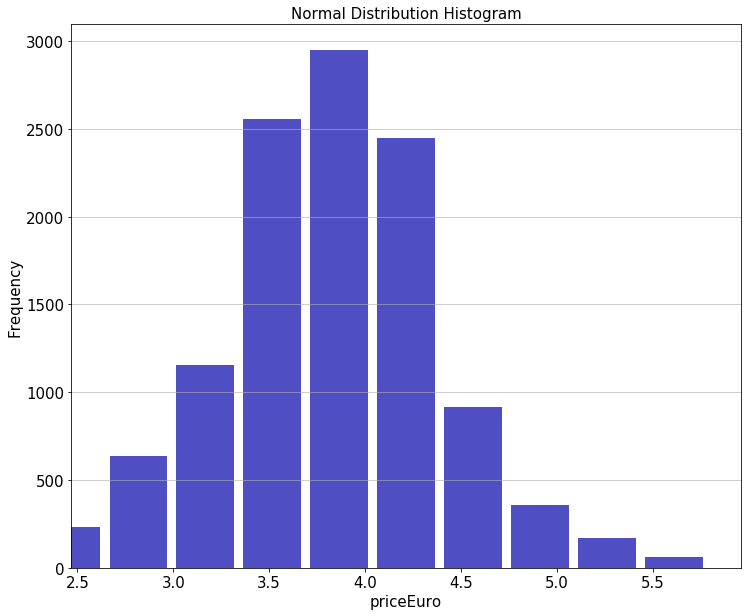

In [22]:
# Use this cell to write the necessary code to create the log + 1 transform and plot it's histogram #9

hist,bin_edges = np.histogram(df_10_to_400['logPriceEuro'])

plt.figure(figsize=[12,10])

plt.bar(bin_edges[:-1], hist, width = 0.3, color='#0504aa',alpha=0.7)
plt.xlim(min(bin_edges), max(bin_edges))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('priceEuro',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Normal Distribution Histogram',fontsize=15)
plt.show()


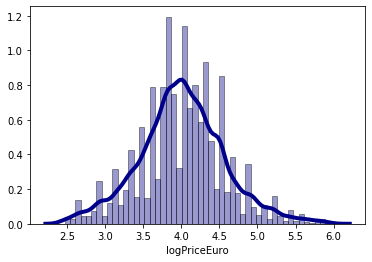

In [23]:
# Density Plot and Histogram of all arrival delays
sns.distplot(df_10_to_400['logPriceEuro'], hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

<b> What do you conclude from the transformation?</b><br>

The distribution become symmetric(uniform) after log transformation.

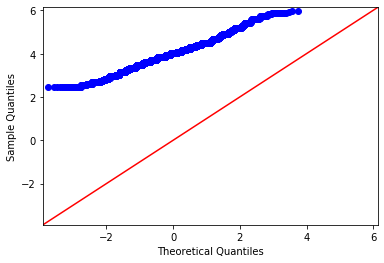

In [110]:
# Use this cell to write the necessary code to perform the q-q plot for Task #9

sm.qqplot(df_10_to_400['logPriceEuro'], line='45')
pylab.show()

In [112]:
# Use this cell to write the necessary code to perform the Kolmogorov-Smirnov test for normality Task #9

from scipy import stats

ks_test = stats.kstest(df_10_to_400['logPriceEuro'].tolist(), 'norm')
ks_test

KstestResult(statistic=0.9932083727404929, pvalue=0.0)

Interpretation of tests: It is important to note the the distributional assumptions are always about the error process not the observed Y thus it is a definite "no-no" to analyze the original series for an appropriate transformation unless the series is defined by a simple constant. So we 'll consider the log transformation variable as opposed to actual variable.

Answer:

<b> Task #10 </b><br>
Now calculate the fraction of hosts (each host is defined unquely by the host_id) in Porto that have 2 or more listings in Porto (divided by the total number of hosts in Porto).

In [185]:
# Use this cell to write the necessary code to perform Task #10

frac = len(df1[df1['host_location'] == 'Porto, Porto, Portugal'])/ len(set(df1['host_id']))
print("Fraction: "+str(round(frac, 2)))

Fraction: 0.05


Answer:

<b> Task #11 </b><br>
Manipulate the smart_location attribute to create a column with the name of the region of the listing. Split the smart_location string by comma and get the first element. Save this as a new column named location.

In [123]:
region = []

for i in df1['smart_location']:
    
    name = i.split(',')
    region.append(name[0])
    name = []
    
print(region[:5])

df1['location'] = region

print(df1['location'].head())

['Porto', 'Vila Nova de Gaia-Palmeira', 'Paredes Municipality', 'Vila Nova de Gaia', 'Estação']
0                         Porto
1    Vila Nova de Gaia-Palmeira
2          Paredes Municipality
3             Vila Nova de Gaia
4                       Estação
Name: location, dtype: object


C:\Users\d store\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


<b> Task #12 </b><br>
What are the 10 most common amenities?

You may assume that each observation does not have repeated amenities and they are separated by a comma.


In [281]:
# make a list of amenities and put all amenities items in that list

amens_list = []

for i in df1['amenities']:
    
    amens = i.split(",")
    
    for j in amens:
        
        amens_list.append(j)
        
len(amens_list)

297207

In [285]:
amenities_series = pd.Series(amens_list) # convert list into series 
amenities_series.value_counts().head(10) # 10 most common amenities with their count 

Essentials             11152
Kitchen                10552
Wifi                   10171
{TV                    10141
Hangers                 9960
"Hair dryer"            9742
"Fire extinguisher"     9028
"First aid kit"         8869
Iron                    8126
Shampoo                 7946
dtype: int64

<b> Task #13 </b><br>

Create the following dummy columns from the ammenities:

tv if 'TV' in ammenities<br>
wifi if 'Wifi' in ammenities<br>
fridge if 'Refrigerator' in ammenities<br>
hostGreets if '"Host greets you"' in ammenities<br>
longTerm if '"Long term stays allowed"' in ammenities<br>
heating if 'Heating' in ammenities<br>

Explain how you created the dummies.

In [174]:
print("Before creating dummies:\n\n")
print(df2['tv'].head())
list1 = []

for i in df2['tv']:
    
    if i == 1:
        
        list1.append('TV')
        
    else:
        
        list1.append('No TV')
        
df2.drop('tv', axis = 1, inplace = True)
df2['tv'] = list1

print("After creating dummies:\n\n")
print(df2['tv'].head())


Before creating dummies:


0    1
1    1
2    1
3    1
4    1
Name: tv, dtype: int64
After creating dummies:


0    TV
1    TV
2    TV
3    TV
4    TV
Name: tv, dtype: object


In [176]:
print("Before creating dummies:\n\n")
print(df2['wifi'].head())
list1 = []

for i in df2['wifi']:
    
    if i == 1:
        
        list1.append('Wifi')
        
    else:
        
        list1.append('No Wifi')
        
df2.drop('wifi', axis = 1, inplace = True)
df2['wifi'] = list1

print("After creating dummies:\n\n")
print(df2['wifi'].head())


Before creating dummies:


0    1
1    1
2    1
3    1
4    1
Name: wifi, dtype: int64
After creating dummies:


0    Wifi
1    Wifi
2    Wifi
3    Wifi
4    Wifi
Name: wifi, dtype: object


In [178]:
print("Before creating dummies:\n\n")
print(df2['fridge'].head())
list1 = []

for i in df2['fridge']:
    
    if i == 1:
        
        list1.append('Refrigrator')
        
    else:
        
        list1.append('No Refrigrator')
        
df2.drop('fridge', axis = 1, inplace = True)
df2['fridge'] = list1

print("After creating dummies:\n\n")
print(df2['fridge'].head())


Before creating dummies:


0    1
1    0
2    1
3    1
4    1
Name: fridge, dtype: int64
After creating dummies:


0       Refrigrator
1    No Refrigrator
2       Refrigrator
3       Refrigrator
4       Refrigrator
Name: fridge, dtype: object


In [180]:
print("Before creating dummies:\n\n")
print(df2['hostGreets'].head())
list1 = []

for i in df2['hostGreets']:
    
    if i == 1:
        
        list1.append('Host greets you')
        
    else:
        
        list1.append('Host does not greet you')
        
df2.drop('hostGreets', axis = 1, inplace = True)
df2['hostGreets'] = list1

print("After creating dummies:\n\n")
print(df2['hostGreets'].head())

Before creating dummies:


0    1
1    1
2    1
3    1
4    1
Name: hostGreets, dtype: int64
After creating dummies:


0    Host greets you
1    Host greets you
2    Host greets you
3    Host greets you
4    Host greets you
Name: hostGreets, dtype: object


In [182]:
print("Before creating dummies:\n\n")
print(df2['longTerm'].head())
list1 = []

for i in df2['longTerm']:
    
    if i == 1:
        
        list1.append('Long term stays allowed')
        
    else:
        
        list1.append('Long term stays is not allowed')
        
df2.drop('longTerm', axis = 1, inplace = True)
df2['longTerm'] = list1

print("After creating dummies:\n\n")
print(df2['longTerm'].head())

Before creating dummies:


0    1
1    1
2    0
3    0
4    0
Name: longTerm, dtype: int64
After creating dummies:


0           Long term stays allowed
1           Long term stays allowed
2    Long term stays is not allowed
3    Long term stays is not allowed
4    Long term stays is not allowed
Name: longTerm, dtype: object


In [184]:
print("Before creating dummies:\n\n")
print(df2['heating'].head())
list1 = []

for i in df2['heating']:
    
    if i == 1:
        
        list1.append('Heating')
        
    else:
        
        list1.append('No heating')
        
df2.drop('heating', axis = 1, inplace = True)
df2['heating'] = list1

print("After creating dummies:\n\n")
print(df2['heating'].head())

Before creating dummies:


0    0
1    1
2    0
3    0
4    0
Name: heating, dtype: int64
After creating dummies:


0    No heating
1       Heating
2    No heating
3    No heating
4    No heating
Name: heating, dtype: object


Answer: We created dummy columns by using for loop and if statement.

## Data Analysis

In this section you will implement some statistical tests to look for insighst and then develop a model to predict the price of a listing.

We will start by loading a dataset name part2.csv which you will use for the next tasks.

Note that we only kept prices between 10 and 400 EUR.

<b> Task #14 </b><br>
Import the part2.csv dataset which includes all the manipulation done in the previous part.

In [146]:
# Use this cell to write the necessary code to perform Task #14

df2 = pd.read_csv('part2.csv')
df2.head()

,id,listing_url,space,host_id,host_since,host_location,host_is_superhost,host_listings_count,host_identity_verified,smart_location,...,priceDollar,priceEuro,location,essentials,tv,wifi,fridge,hostGreets,longTerm,heating
0,41339,https://www.airbnb.com/rooms/41339,"Apartment facing Southeast, with a big bedroom...",180050,7/25/2010,"Oporto, Porto District, Portugal",f,19.0,t,"Porto, Portugal",...,58,52.2,Porto,1,1,1,1,1,1,0
1,42462,https://www.airbnb.com/rooms/42462,It's the perfect choice for family holidays or...,185492,7/30/2010,"Vila Nova de Gaia, Porto District, Portugal",t,3.0,t,"Vila Nova de Gaia-Palmeira, Portugal",...,50,45.0,Vila Nova de Gaia-Palmeira,1,1,1,0,1,1,1
2,55111,https://www.airbnb.com/rooms/55111,The first floor in house with shared pool. It...,259711,10/12/2010,"Porto, Porto, Portugal",t,3.0,t,"Paredes Municipality, Portugal",...,66,59.4,Paredes Municipality,1,1,1,1,1,0,0
3,70925,https://www.airbnb.com/rooms/70925,Apartment with the best view of the Porto city...,361205,1/25/2011,"Vila Nova de Gaia, Porto District, Portugal",t,2.0,t,"Vila Nova de Gaia, Portugal",...,97,87.3,Vila Nova de Gaia,1,1,1,1,1,0,0
4,73828,https://www.airbnb.com/rooms/73828,The first floor in house with shared pool. Ou...,259711,10/12/2010,"Porto, Porto, Portugal",t,3.0,t,"Estação, Portugal",...,66,59.4,Estação,1,1,1,1,1,0,0


<b> Task #15 </b><br>
Create a figure that compares the boxplots of different locations: 'Porto', 'Vila Nova de Gaia', 'Matosinhos', 'Póvoa de Varzim', 'Vila do Conde' and 'Espinho' (use these exact strings on the location column).

What insights can we extract from comparing the different boxplots?

In [151]:
df_10_to_400_2nd = df2[(df2['priceEuro'] >=10) & (df2['priceEuro'] <=400)]
len(df_10_to_400_2nd)

11479

In [153]:
print(df_10_to_400_2nd['location'].head())
print(df_10_to_400_2nd['priceEuro'].head())


0                         Porto
1    Vila Nova de Gaia-Palmeira
2          Paredes Municipality
3             Vila Nova de Gaia
4                       Estação
Name: location, dtype: object
0    52.2
1    45.0
2    59.4
3    87.3
4    59.4
Name: priceEuro, dtype: float64


In [162]:
df_for_box_plot = df_10_to_400_2nd[(df_10_to_400_2nd['location'] == 'Porto') | (df_10_to_400_2nd['location'] == 'Vila Nova de Gaia') |
                                   (df_10_to_400_2nd['location'] == 'Matosinhos') | (df_10_to_400_2nd['location'] == 'Póvoa de Varzim') |
                                  (df_10_to_400_2nd['location'] == 'Vila do Conde') | (df_10_to_400_2nd['location'] == 'Espinho')]




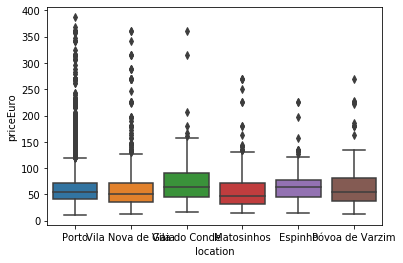

In [164]:
sns.boxplot(x = 'location', y = 'priceEuro', data = df_for_box_plot)

In vartical bar plot, name of locations are not clearly visible

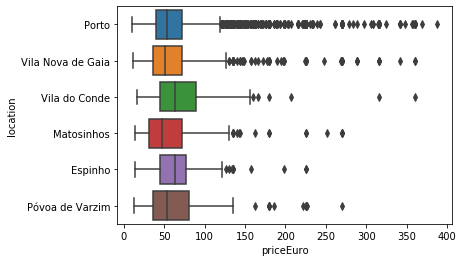

In [165]:
sns.boxplot(x = 'priceEuro', y = 'location', data = df_for_box_plot) 

<b>Q. What insights can we extract from comparing the different boxplots?</b><br>
Answer: Side by side box plots or box plot comparison especially used for visually comparing two or more data sets. <br>
This comparison includes:<br>
<br>
1- Comparison of centrality<br>
2- Comparison of spread<br>
3- Comparison of symmetry and skewness


<b> Task #16 </b><br>
Statistically determine whether the averages between the cities are the same. Describe the results of the test.

Describe: what the null hypothesis represents, the alpha you are using, the test statistic used and what was its value, the p-value and it's impact on the null hypothesis and the conclusion of the test.

In [290]:
# find mean for all location prices
all_loc_price_means = df_for_box_plot.groupby(['location']).mean()['priceEuro']
all_loc_price_means

location
Espinho              66.845455
Matosinhos           60.552155
Porto                63.339545
Póvoa de Varzim      68.391304
Vila Nova de Gaia    62.953059
Vila do Conde        70.881429
Name: priceEuro, dtype: float64

In [319]:
x_bar = np.mean(all_loc_price_means.tolist())

std = np.std(all_loc_price_means.tolist())

std = np.round(std, 2)

count = len(all_loc_price_means.tolist())

print("X_bar: "+str(round(x_bar,2)))

print("Std. "+str(std))

print("Count: "+str(count))


X_bar: 65.49
Std. 3.53
Count: 6


In [320]:
# calculate standard error

se = (std)/(np.sqrt(count))
se = np.round(se, 2)
se

1.44

<b>Null hypothesis:</b> The averages between the cities are same. <br>
<b>Alternative hypothesis:</b> The averages between the cities are different.<br>
<b>Significance Level:</b> A significance level of 0.05 indicates a 5% risk of concluding that a difference exists when there is no actual difference. (alfa = 0.05)


In [323]:
mieu = df_for_box_plot['priceEuro'].mean()
mieu = np.round(mieu, 2)
mieu

63.49

In [329]:
# Use this cell to write the necessary code to perform Task #16

z = (x_bar - mieu)/se
z = np.round(z, 2)
z

1.39

In [337]:
import scipy
p_values = scipy.stats.norm.sf(abs(z))*2
p_values = np.round(p_values, 2)
p_values

0.16

### Test Result: <br>
Since 0.16 > 0.05 (p_value > alfa), So we won't reject null hypothesis.

<b> Task #17 </b><br>
Now you will study if two envents are independent or not. In particular, do listings with a room type 'Entire home/apt' tend to have review_scores_rating of 90 or more?

Start by creating a contingency table to compare the ocorrences of listings in each of the four possible categories.

In [349]:
contingency_table = pd.crosstab(df_10_to_400_2nd.room_type, df_10_to_400_2nd.review_scores_rating>90)
contingency_table

review_scores_rating,False,True
room_type,,
Entire home/apt,2727,6167
Hotel room,148,177
Private room,959,1189
Shared room,51,61


In [353]:
df_10_to_400_2nd['room_type'].value_counts()

Entire home/apt    8894
Private room       2148
Hotel room          325
Shared room         112
Name: room_type, dtype: int64

<b> Task #18 </b><br>
Then use a statistical method to determine the independence of both events and describe the results.

Describe: what the null hypothesis represents, the alpha you are using, the test statistic used and what was its value, the p-value and it's impact on the null hypothesis and the conclusion of the test. 

#### Answer:
<b>Null hypothesis:</b> Two events 'room_type' and 'review_scores_rating are dependent'.<br>
<b>Alternative hypothesis:</b> Two events 'room_type' and 'review_scores_rating' are independent.<br>
<b>Significance Level:</b> A significance level of 0.05 indicates a 5% risk of concluding that a difference exists when there is no actual difference. (alfa = 0.05)


In [386]:
obs_grt_90 = len(df_10_to_400_2nd[df_10_to_400_2nd['review_scores_rating'] > 90])
total_obs = len(df_10_to_400_2nd)

prob = obs_grt_90/total_obs
prob = np.round(prob, 2)

std = np.nanstd(df_10_to_400_2nd['review_scores_rating'].tolist())
std = np.round(std, 2)
print(std)


se = (std)/(np.sqrt(count))
se = np.round(se, 2)
se


7.35


3.0

In [389]:
# inference

z = (prob-0)/se
z = np.round(z,2)
z




0.22

In [390]:
import scipy
p_values = scipy.stats.norm.sf(abs(z))*2
p_values = np.round(p_values, 2)
p_values

0.83

### Test Result: <br>
Since 0.83 > 0.05 (p_value > alfa), So we won't reject null hypothesis.

<b> Task #19 </b><br>
Create two new variables from the dataset that can aid you in detecting the price.

Explain from a functional/logical point of view why these features might be relevant.

In [360]:
# first we find all numerical variables exist in data

numerical_vars = ['host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'availability_30',
                  'availability_60', 'availability_90', 'availability_365', 'review_scores_rating', 'availability_60', 'availability_90',
                  'availability_365', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                  'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count',
                  'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms',
                  'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 'essentials', 'priceEuro']






numerical_vars_df= df_10_to_400_2nd[numerical_vars]
numerical_vars_df.head()

,host_listings_count,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,...,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,essentials,priceEuro
0,19.0,5,1.0,1.0,4.0,2,90,0,0,0,...,10.0,9.0,9.0,1,1,0,0,0.21,1,52.2
1,3.0,9,3.0,3.0,8.0,4,365,0,0,3,...,10.0,9.0,9.0,3,3,0,0,0.46,1,45.0
2,3.0,5,1.0,2.0,5.0,4,8,0,0,0,...,10.0,10.0,10.0,3,3,0,0,0.26,1,59.4
3,2.0,6,1.0,2.0,2.0,4,177,23,46,76,...,10.0,10.0,10.0,2,2,0,0,0.56,1,87.3
4,3.0,5,1.0,2.0,5.0,4,8,0,0,0,...,10.0,10.0,9.0,3,3,0,0,0.14,1,59.4


In [196]:
# finding best features to make model.
numerical_vars_df.corrwith(numerical_vars_df.priceEuro).sort_values(ascending=False)

priceEuro                                       1.000000
accommodates                                    0.498232
bedrooms                                        0.457833
beds                                            0.402379
bathrooms                                       0.397919
availability_365                                0.133319
availability_365                                0.133319
availability_30                                 0.119054
availability_60                                 0.114912
availability_60                                 0.114912
availability_90                                 0.109626
availability_90                                 0.109626
review_scores_rating                            0.074736
review_scores_rating                            0.074736
review_scores_cleanliness                       0.061763
review_scores_location                          0.057000
calculated_host_listings_count_entire_homes     0.052010
host_listings_count            

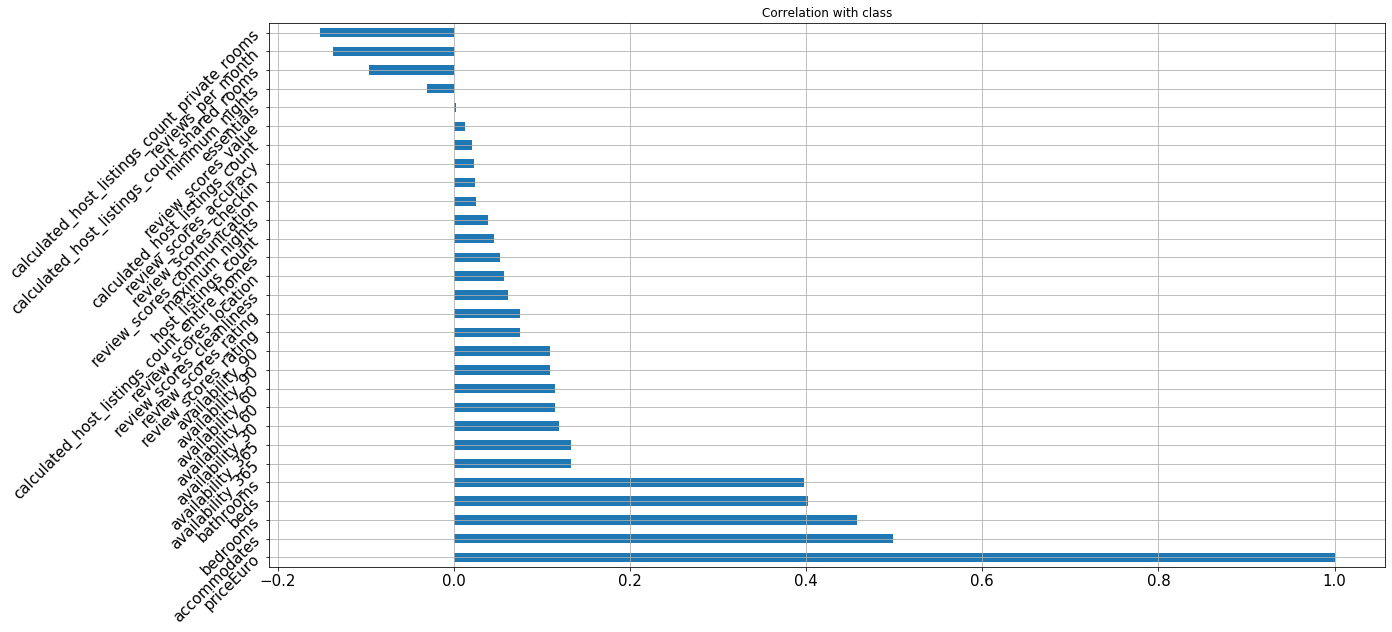

In [372]:
numerical_vars_df.corrwith(numerical_vars_df.priceEuro).sort_values(ascending=False).plot.barh(
        figsize = (20, 10), title = "Correlation with class", fontsize = 15,
        rot = 45, grid = True)

In [199]:
numerical_vars_df.corrwith(numerical_vars_df.priceEuro).sort_values(ascending=False).index

Index(['priceEuro', 'accommodates', 'bedrooms', 'beds', 'bathrooms',
       'availability_365', 'availability_365', 'availability_30',
       'availability_60', 'availability_60', 'availability_90',
       'availability_90', 'review_scores_rating', 'review_scores_rating',
       'review_scores_cleanliness', 'review_scores_location',
       'calculated_host_listings_count_entire_homes', 'host_listings_count',
       'maximum_nights', 'review_scores_communication',
       'review_scores_checkin', 'review_scores_accuracy',
       'calculated_host_listings_count', 'review_scores_value', 'essentials',
       'minimum_nights', 'calculated_host_listings_count_shared_rooms',
       'reviews_per_month', 'calculated_host_listings_count_private_rooms'],
      dtype='object')

In [363]:
# So a/c to correlation, most relevant features are

relevant_features = ['accommodates', 'bedrooms', 'beds', 'bathrooms', 'calculated_host_listings_count_shared_rooms',
       'reviews_per_month', 'calculated_host_listings_count_private_rooms', 'priceEuro']


relevant_features_df = df_10_to_400_2nd[relevant_features]

relevant_features_df.head()

,accommodates,bedrooms,beds,bathrooms,calculated_host_listings_count_shared_rooms,reviews_per_month,calculated_host_listings_count_private_rooms,priceEuro
0,5,1.0,4.0,1.0,0,0.21,0,52.2
1,9,3.0,8.0,3.0,0,0.46,0,45.0
2,5,2.0,5.0,1.0,0,0.26,0,59.4
3,6,2.0,2.0,1.0,0,0.56,0,87.3
4,5,2.0,5.0,1.0,0,0.14,0,59.4


<b> The 2 most relevant features are: </b><br>
1- accommodates <br>
2- bedrooms<br>

Because they are strongly correlated with priceEuro.

<b> Task #20 </b><br>
Calculate the correlation matrix between the numeric variables that are candidates to be inputs in the model. Reduce the number of variables by removing highly correlated variables from the candidates list.

Explain your rationale during this proces in the answer section.

In [364]:
# Use this cell to write the necessary code to perform Task #20

relevant_features_df.corr()


,accommodates,bedrooms,beds,bathrooms,calculated_host_listings_count_shared_rooms,reviews_per_month,calculated_host_listings_count_private_rooms,priceEuro
accommodates,1.000000,0.773263,0.826749,0.546617,-0.025512,-0.064703,-0.223856,0.498232
bedrooms,0.773263,1.000000,0.722381,0.625045,-0.039364,-0.118938,-0.096465,0.457833
beds,0.826749,0.722381,1.000000,0.536819,0.067708,-0.094261,-0.138116,0.402379
bathrooms,0.546617,0.625045,0.536819,1.000000,0.027152,-0.100913,0.097297,0.397919
calculated_host_listings_count_shared_rooms,-0.025512,-0.039364,0.067708,0.027152,1.000000,-0.060205,0.055021,-0.096588
reviews_per_month,-0.064703,-0.118938,-0.094261,-0.100913,-0.060205,1.000000,-0.057721,-0.136690
calculated_host_listings_count_private_rooms,-0.223856,-0.096465,-0.138116,0.097297,0.055021,-0.057721,1.000000,-0.151906
priceEuro,0.498232,0.457833,0.402379,0.397919,-0.096588,-0.136690,-0.151906,1.000000


In [365]:
relevant_features_df.columns

Index(['accommodates', 'bedrooms', 'beds', 'bathrooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'calculated_host_listings_count_private_rooms', 'priceEuro'],
      dtype='object')

In [366]:
# we delete 'bathrooms','calculated_host_listings_count_shared_rooms'

cols = ['bathrooms','calculated_host_listings_count_shared_rooms'] # deleting these 2 cols

relevant_features_df.drop(cols, axis = 1, inplace = True) # deleting all 2 cols


relevant_features_df.head()

C:\Users\d store\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,accommodates,bedrooms,beds,reviews_per_month,calculated_host_listings_count_private_rooms,priceEuro
0,5,1.0,4.0,0.21,0,52.2
1,9,3.0,8.0,0.46,0,45.0
2,5,2.0,5.0,0.26,0,59.4
3,6,2.0,2.0,0.56,0,87.3
4,5,2.0,5.0,0.14,0,59.4


In [367]:
relevant_features_df.columns

Index(['accommodates', 'bedrooms', 'beds', 'reviews_per_month',
       'calculated_host_listings_count_private_rooms', 'priceEuro'],
      dtype='object')

Answer:

<b> Task #21 </b><br>
Create a OLS linear model to represent the priceEur as the function of the numerical variables you have in the dataset (only use the numerical variables you have and do not use price nor priceDollar).

State what is the metric you are optimizing the model for.

We will grade you in finding a good balance between this optimized metric and maintaining statistical of the variables. Around 10 variables in the model should give you good results.

Explain the process you used to iterate between varibles to get to your results.

Note: you can skip outlier detection and variable normalization.

In [368]:
import pandas as pd
import statsmodels.formula.api as sm
f1 = 'priceEuro~accommodates+bedrooms+beds+reviews_per_month+calculated_host_listings_count_private_rooms'
result = sm.ols(formula= f1, data=relevant_features_df).fit()
print(result.params)
print(result.summary())

Intercept                                       28.266337
accommodates                                     8.169237
bedrooms                                         7.475211
beds                                            -1.957829
reviews_per_month                               -2.133078
calculated_host_listings_count_private_rooms    -1.129982
dtype: float64
                            OLS Regression Results                            
Dep. Variable:              priceEuro   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     910.8
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:27:58   Log-Likelihood:                -49139.
No. Observations:                9963   AIC:                         9.829e+04
Df Residuals:                    9957   BIC:                         9.833e+04
Df Mo

<b>State what is the metric you are optimizing the model for.</b>

Answer: We are using <b> Adj. R-squared</b> as metrics for optimizing the model.



Answer: 

<b> Task #22 </b><br>
Interpret the results of the model, focusing on the functional interpretation of the coefficients.

What other information could help you increasing the price prediction?

#### Ans
In the end we have model equation that is given below:<br>
  
priceEuro = 28.27 + 8.17(accommodates) + 7.48(bedrooms) - 1.96(beds) -2.13(reviews_per_month) - 1.13(calculated_host_listings_count_private_rooms) 
    


<b> What other information could help you increasing the price prediction? </b>

We can do many things to make better price prediction like, we can remove outliers, we can use more or less features, we can use other ML techniques, or we can use deep learning techniques etc.

# End of the Project